Test Accuracy for Different K values:
K = 1: Test Accuracy = 1.00
K = 2: Test Accuracy = 1.00
K = 3: Test Accuracy = 1.00
K = 4: Test Accuracy = 1.00
K = 5: Test Accuracy = 1.00

Optimal K found: 1
Test Accuracy for Optimal K: 1.00


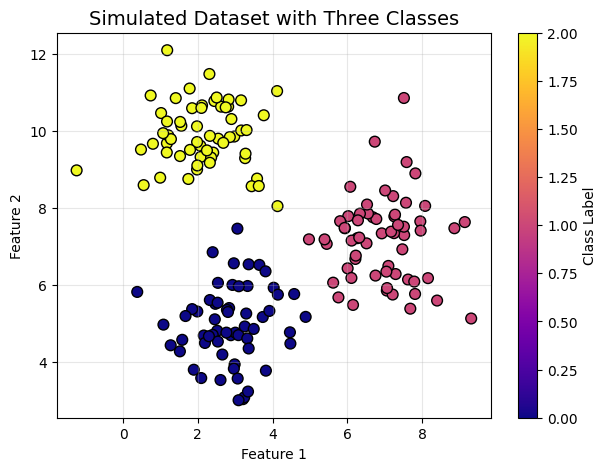

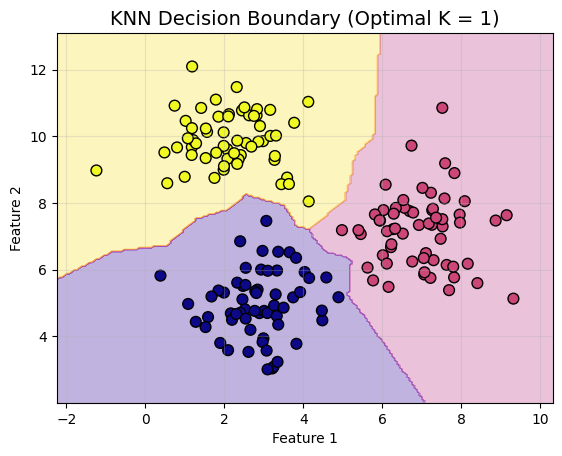

In [3]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Generate a simulated dataset with three classes
features, labels = make_blobs(
    n_samples=180,
    centers=[[3, 5], [7, 7], [2, 10]],
    cluster_std=1.0,
    random_state=42
)
# Split the data into 80% training and 20% testing
train_data, test_data, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, test_size=0.2, random_state=21
)

# Function to train KNN and evaluate accuracy


def run_knn(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_labels)

    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)

    results = {
        "k": k,
        "train_accuracy": accuracy_score(train_labels, train_pred),
        "test_accuracy": accuracy_score(test_labels, test_pred),
    }

    print(f"\nResults for k={k}:")
    print(f"Train Accuracy: {results['train_accuracy']:.3f}")
    print(f"Test Accuracy: {results['test_accuracy']:.3f}")
    print(classification_report(test_labels, test_pred))

    return model, results

k_list = range(1, 6)
models = {}
test_accuracies = {}

# Try different values of k and store results
k_list = range(1, 6)  # Now testing for k = 1, 2, 3, 4, 5
models = {}
test_accuracies = {}

print("Test Accuracy for Different K values:")
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_labels)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_labels, test_pred)
    test_accuracies[k] = acc
    models[k] = model
    print(f"K = {k}: Test Accuracy = {acc:.2f}")  # Display accuracy for each k

# Find the best k based on highest test accuracy
optimal_k = max(test_accuracies, key=test_accuracies.get)
best_model = models[optimal_k]

print(f"\nOptimal K found: {optimal_k}")
print(f"Test Accuracy for Optimal K: {test_accuracies[optimal_k]:.2f}")

# Plot the dataset
plt.figure(figsize=(7, 5))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='plasma', edgecolor='k', s=60)
plt.title("Simulated Dataset with Three Classes", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.colorbar(label="Class Label")
plt.show()

# Plot the decision boundary for the best model
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='plasma')
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='plasma', edgecolor='k', s=60)
plt.title(f"KNN Decision Boundary (Optimal K = {optimal_k})", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(alpha=0.3)
plt.show()